In [82]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [83]:
def propagazione_cursori(Vdiv, measure):

    sigma = np.sqrt( (0.04 * Vdiv)**2 + (0.015 * measure)**2)

    return sigma

In [114]:
def lin(x, a, b):  
    return a + b * x

def esp(x, a, b, c):  
    return a + b * np.exp(- x * c**-1)


# Calibrazione

***

In [85]:
# OSC DATA
file_in =  '../../Data/PreAmp/calib_in_18.txt'
file_vdiv =  '../../Data/PreAmp/calib_in_vdiv_18.txt'

# ARDUINO DATA
file1 = '../../Data/PreAmp/calib_02_18_ROOT.dat'
file2 = '../../Data/PreAmp/calib_05_18_ROOT.dat'
file3 = '../../Data/PreAmp/calib_08_18_ROOT.dat'
file4 = '../../Data/PreAmp/calib_10_18_ROOT.dat'
file5 = '../../Data/PreAmp/calib_12_18_ROOT.dat'
file6 = '../../Data/PreAmp/calib_15_18_ROOT.dat'
file7 = '../../Data/PreAmp/calib_18_18_ROOT.dat'
file8 = '../../Data/PreAmp/calib_20_18_ROOT.dat'
file9 = '../../Data/PreAmp/calib_21_18_ROOT.dat'
file10 = '../../Data/PreAmp/calib_22_18_ROOT.dat'
file11 = '../../Data/PreAmp/calib_23_18_ROOT.dat'
file12 = '../../Data/PreAmp/calib_24_18_ROOT.dat'
file13 = '../../Data/PreAmp/calib_25_18_ROOT.dat'

# READ ARDUINO DATA
data1 = pd.read_csv(file1, sep = ' ', index_col = False, header = None)
data1.index = np.arange(1, len(data1)+1)
data1.columns = ['time', 'ADC']
data2 = pd.read_csv(file2, sep = ' ', index_col = False, header = None)
data2.index = np.arange(1, len(data2)+1)
data2.columns = ['time', 'ADC']
data3 = pd.read_csv(file3, sep = ' ', index_col = False, header = None)
data3.index = np.arange(1, len(data3)+1)
data3.columns = ['time', 'ADC']
data4 = pd.read_csv(file4, sep = ' ', index_col = False, header = None)
data4.index = np.arange(1, len(data4)+1)
data4.columns = ['time', 'ADC']
data5 = pd.read_csv(file5, sep = ' ', index_col = False, header = None)
data5.index = np.arange(1, len(data5)+1)
data5.columns = ['time', 'ADC']
data6 = pd.read_csv(file6, sep = ' ', index_col = False, header = None)
data6.index = np.arange(1, len(data6)+1)
data6.columns = ['time', 'ADC']
data7 = pd.read_csv(file7, sep = ' ', index_col = False, header = None)
data7.index = np.arange(1, len(data7)+1)
data7.columns = ['time', 'ADC']
data8 = pd.read_csv(file8, sep = ' ', index_col = False, header = None)
data8.index = np.arange(1, len(data8)+1)
data8.columns = ['time', 'ADC']
data9 = pd.read_csv(file9, sep = ' ', index_col = False, header = None)
data9.index = np.arange(1, len(data9)+1)
data9.columns = ['time', 'ADC']
data10 = pd.read_csv(file10, sep = ' ', index_col = False, header = None)
data10.index = np.arange(1, len(data10)+1)
data10.columns = ['time', 'ADC']
data11 = pd.read_csv(file11, sep = ' ', index_col = False, header = None)
data11.index = np.arange(1, len(data11)+1)
data11.columns = ['time', 'ADC']
data12 = pd.read_csv(file12, sep = ' ', index_col = False, header = None)
data12.index = np.arange(1, len(data12)+1)
data12.columns = ['time', 'ADC']
data13 = pd.read_csv(file13, sep = ' ', index_col = False, header = None)
data13.index = np.arange(1, len(data13)+1)
data13.columns = ['time', 'ADC']

# GET MAX VALUES
max1 = data1['ADC'].max()
max2 = data2['ADC'].max()
max3 = data3['ADC'].max()
max4 = data4['ADC'].max()
max5 = data5['ADC'].max()
max6 = data6['ADC'].max()
max7 = data7['ADC'].max()
max8 = data8['ADC'].max()
max9 = data9['ADC'].max()
max10 = data10['ADC'].max()
max11 = data11['ADC'].max()
max12 = data12['ADC'].max()
max13 = data13['ADC'].max()
max_values = np.array([max1, max2, max3, max4, max5, max6, max7, max8, max9, max10, max11, max12, max13])

# READ OSC DATA
Vin = np.loadtxt(file_in)
Vdiv = np.loadtxt(file_vdiv)

# MAKE DATAFRAME
data = pd.DataFrame({'max_values': list(max_values), 'Vin': list(Vin), 'Vdiv': list(Vdiv)}, columns = ['max_values', 'Vin', 'Vdiv'])

# ERROR PROPAGATION ON OSC DATA
data['err Vin'] = propagazione_cursori(data['Vdiv'], data['Vin'])

# SELECT RELEVANT DATAPOINTS
data = data.iloc[:4,:]

# SHOW DATA
data

,max_values,Vin,Vdiv,err Vin
0,1019,0.206,0.05,0.003681
1,1383,0.512,0.10,0.008659
2,1765,0.824,0.20,0.014723
3,2019,1.020,0.20,0.017265


In [86]:
# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = data['max_values'], ydata = data['Vin'], sigma = data['err Vin'], absolute_sigma = True)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]

# PRINT CALIBRATION FUNCTION
print(
        'VOLT = ' +  ' (' + format(a, '.3f') + ' +/- ' + format(err_a, '.3f') + ') ' + ' + ' 
        + ' (' + format(b, '.6f') + ' +/- ' + format(err_b, '.6f') + ') ' + ' ADC'
    )

VOLT =  (-0.633 +/- 0.015)  +  (0.000824 +/- 0.000013)  ADC


# Preamplifier Waveform

***

In [87]:
# ARDUINO WAVEFORM DATA
file_name = '../../Data/PreAmp/data_arduino.dat'

# READ DATA
data = pd.read_csv(file_name, index_col = False, header = None, sep = ' ')
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']

# CALIBRATION
# on time
data['time (ms)'] = data['time'] * 1e3 * 955000**-1
# on tension
data['V (V)'] = a + b * data['ADC']

# TOTAL ERROR PROPAGATION
data['err V (V)'] = np.sqrt( ( err_a )**2 + ( err_b * data['ADC'] )**2)

# ERROR PROPAGATION SENZA CONTRIBUTO DI SCALA
data['err Vr (V)'] = err_a

# SHOW DATA
data

,time,ADC,time (ms),V (V),err V (V),err Vr (V)
1,1,795,0.001047,0.022105,0.017875,0.014785
2,2,793,0.002094,0.020457,0.017861,0.014785
3,3,793,0.003141,0.020457,0.017861,0.014785
4,4,798,0.004188,0.024577,0.017897,0.014785
5,5,795,0.005236,0.022105,0.017875,0.014785
...,...,...,...,...,...,...
2043,2043,793,2.139267,0.020457,0.017861,0.014785
2044,2044,776,2.140314,0.006450,0.017741,0.014785
2045,2045,787,2.141361,0.015514,0.017819,0.014785
2046,2046,788,2.142408,0.016337,0.017826,0.014785


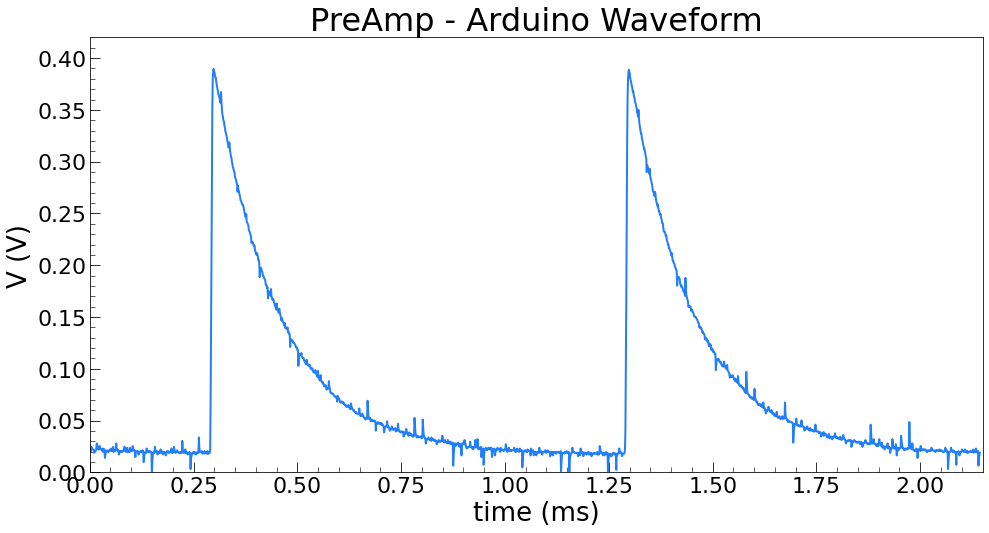

In [88]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['time (ms)'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(data['time'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 2.15)
ax1.set_ylim(bottom = 0, top = 0.42)

plt.show()

# Compute the Mean

***

In [89]:
# SPLIT DATA INTO TWO DATAFRAMES
data1 = data.iloc[276:1231,:]
data2 = data.iloc[1231:,:]

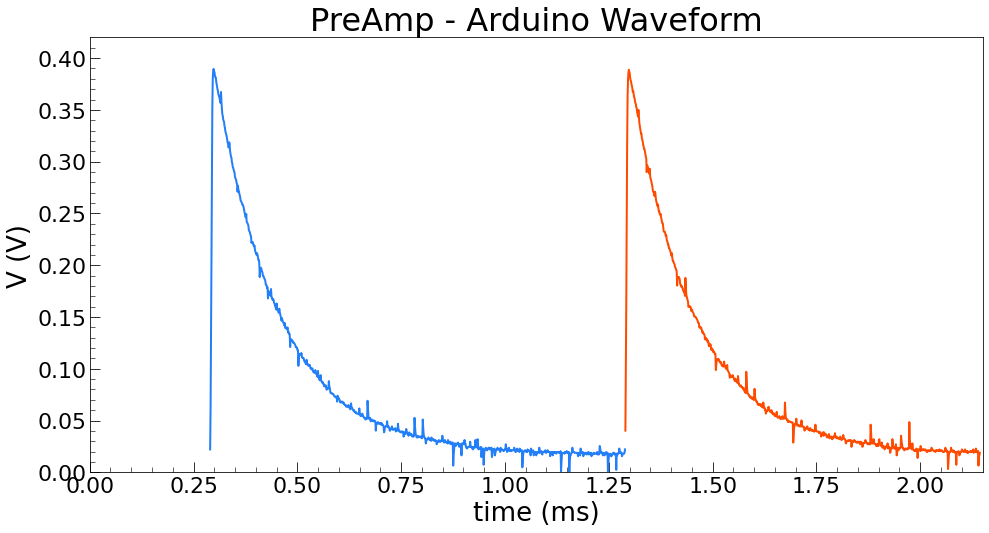

In [90]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data1['time (ms)'], data1['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(data2['time (ms)'], data2['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')
# ax1.plot(data['time'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 2.15)
ax1.set_ylim(bottom = 0, top = 0.42)

plt.show()

In [91]:
# TRASLAZIONE A ZERO
data1['time'] = data1['time'] - 276
data2['time'] = data2['time'] - 1231
data1.reset_index(inplace = True)
data2.reset_index(inplace = True)

In [92]:
data1['time (ms)'] = data1['time'] * 1e3 * 955000**-1
data2['time (ms)'] = data2['time'] * 1e3 * 955000**-1

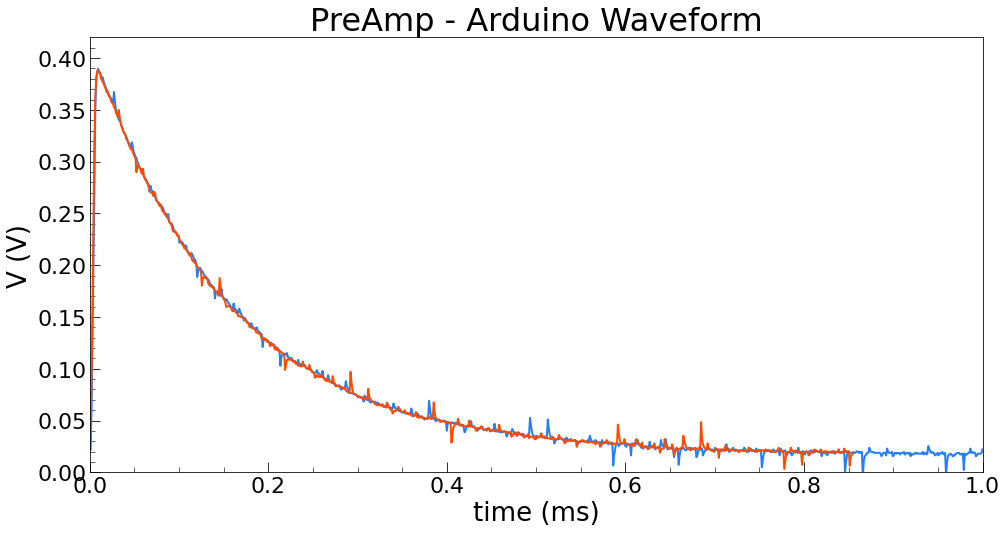

In [122]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data1['time (ms)'], data1['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(data2['time (ms)'], data2['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')
# ax1.plot(data['time'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)

plt.show()

In [101]:
V1 = data1['V (V)']
V2 = data2['V (V)']
V_12 = pd.concat((V1, V2))
V_12

V = V_12.groupby(V_12.index)
V_mean = V.mean()
V_mean

0      0.031168
1      0.078544
2      0.145283
3      0.220673
4      0.297710
         ...   
950    0.017985
951    0.017985
952    0.017985
953    0.018809
954    0.022105
Name: V (V), Length: 955, dtype: float64

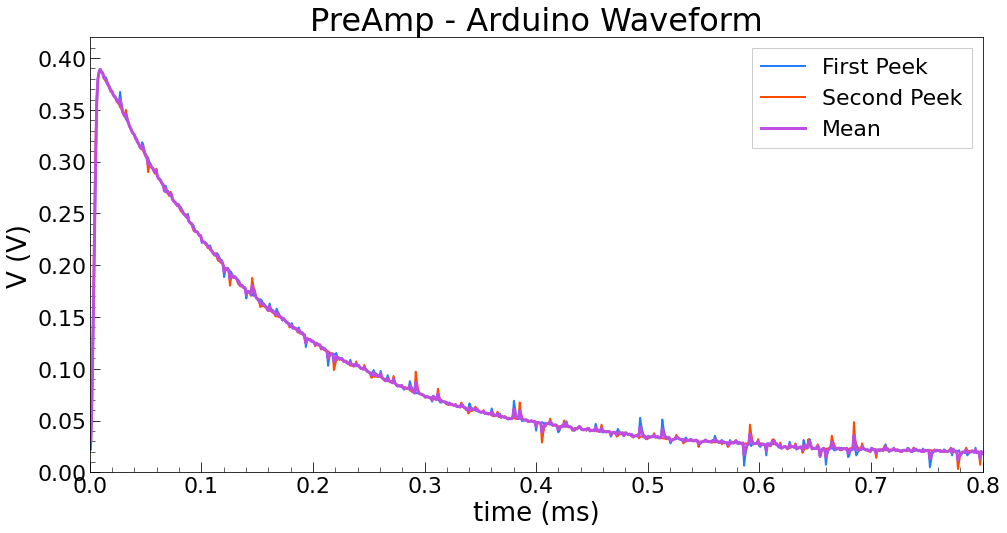

In [125]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data1['time (ms)'], data1['V (V)'], color = '#227FF7', linewidth = 2, label = 'First Peek')
ax1.plot(data2['time (ms)'], data2['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Second Peek')
ax1.plot(data1['time (ms)'], V_mean, color = '#BE4EE1', linewidth = 3, label = 'Mean')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)

ax1.legend(loc = 'best', prop = {'size': 22}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)

plt.show()

In [109]:
err_V_mean = data1['err Vr (V)'] * 2**-0.5
err_V_mean

0      0.010455
1      0.010455
2      0.010455
3      0.010455
4      0.010455
         ...   
950    0.010455
951    0.010455
952    0.010455
953    0.010455
954    0.010455
Name: err Vr (V), Length: 955, dtype: float64

In [166]:
final_data = pd.concat([data1['time'], data1['time (ms)'], V_mean, err_V_mean], axis=1)
final_data = final_data[(final_data['time (ms)'] < 0.8)]
final_data = final_data.iloc[8:,:]
final_data

,time,time (ms),V (V),err Vr (V)
8,9,0.009424,0.389167,0.010455
9,10,0.010471,0.386695,0.010455
10,11,0.011518,0.385871,0.010455
11,12,0.012565,0.381751,0.010455
12,13,0.013613,0.380103,0.010455
...,...,...,...,...
758,759,0.794764,0.018809,0.010455
759,760,0.795812,0.019633,0.010455
760,761,0.796859,0.019633,0.010455
761,762,0.797906,0.013454,0.010455


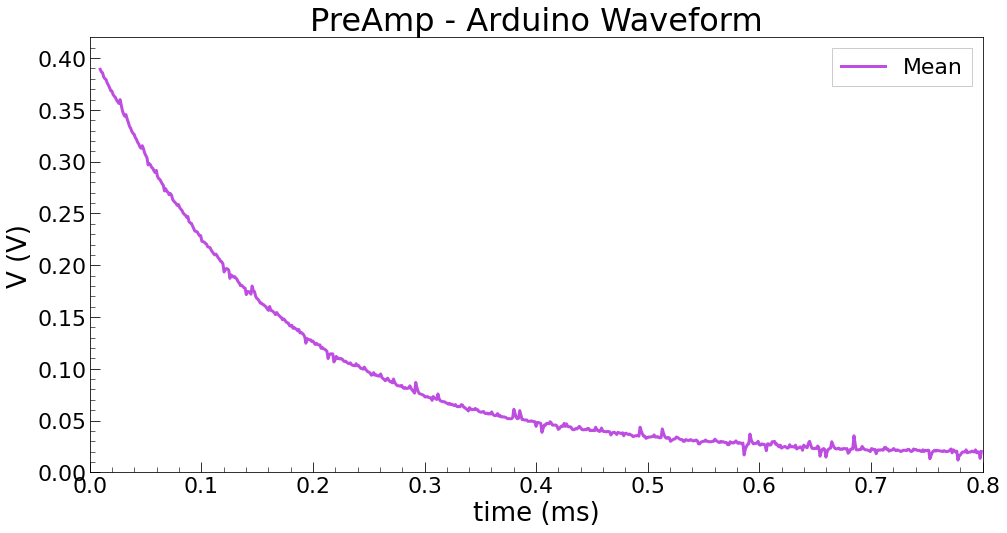

In [143]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(final_data['time (ms)'], final_data['V (V)'], color = '#BE4EE1', linewidth = 3, label = 'Mean')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)

ax1.legend(loc = 'best', prop = {'size': 22}, ncol = 1, frameon = True, fancybox = False, framealpha = 1)

plt.show()

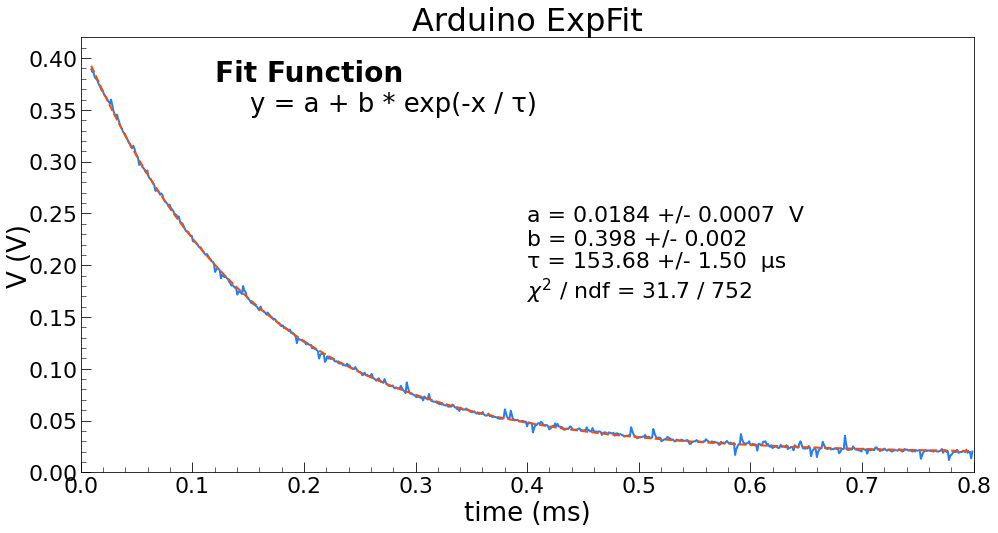

In [147]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# FILTERED FIT
par, cov = curve_fit(f = esp, xdata = final_data['time (ms)'], ydata = final_data['V (V)'], maxfev=1000, 
                    p0 = [0.02, 0.6, 0.151], sigma = final_data['err Vr (V)'], absolute_sigma = True)

func = esp(final_data['time (ms)'], *par)

# COMPUTE RESIDUALS
res = final_data['V (V)'] - func

# COMPUTE CHI2
chi2 = np.sum((res/final_data['err Vr (V)'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
tau = fit_par[2]
a_err = fit_err[0]
b_err = fit_err[1]
tau_err = fit_err[2]

# PLOT DATA
ax1.plot(final_data['time (ms)'], final_data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(final_data['time (ms)'], func, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

aa = 'a = ' + format(a, '1.4f') + ' +/- ' + format(a_err, '1.4f') + '  V'
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(b_err, '1.3f')
cc = '\u03C4 = ' + format(tau * 1e3, '1.2f') + ' +/- ' + format(tau_err * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(final_data['time (ms)'] ) - len(par), '1.0f') 


ax1.text(0.15, 0.90, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.19, 0.83, 'y = a + b * exp(-x / \u03C4)', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.5, 0.4, aa + '\n' + bb + '\n' + cc + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)

# PLOT TITLE
ax1.set_title('Arduino ExpFit', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26, labelpad = -5)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)

plt.show()

# Linearizzazione 

***

In [169]:
lin_data = final_data.copy()

In [170]:
lin_data['time'] = lin_data['time'] - 8
lin_data.reset_index(inplace = True)
lin_data.drop(labels = 'index', axis = 1, inplace=True)
lin_data

,time,time (ms),V (V),err Vr (V)
0,1,0.009424,0.389167,0.010455
1,2,0.010471,0.386695,0.010455
2,3,0.011518,0.385871,0.010455
3,4,0.012565,0.381751,0.010455
4,5,0.013613,0.380103,0.010455
...,...,...,...,...
750,751,0.794764,0.018809,0.010455
751,752,0.795812,0.019633,0.010455
752,753,0.796859,0.019633,0.010455
753,754,0.797906,0.013454,0.010455


In [176]:
lin_data['V (V)'] = lin_data['V (V)'] - a
lin_data['err Vr (V)'] = np.sqrt(lin_data['err Vr (V)']**2 + err_a**2)

lin_data = lin_data[(lin_data['V (V)'] > 0)]

lin_data['logV'] = np.log(lin_data['V (V)'])
lin_data['err logV'] = lin_data['err Vr (V)'] / lin_data['V (V)']


lin_data

,time,time (ms),V (V),err Vr (V),logV,err logV
0,1,0.009424,0.278656,0.023377,-1.277779,0.083892
1,2,0.010471,0.276184,0.023377,-1.286689,0.084643
2,3,0.011518,0.275360,0.023377,-1.289677,0.084896
3,4,0.012565,0.271240,0.023377,-1.304751,0.086186
4,5,0.013613,0.269592,0.023377,-1.310844,0.086713
...,...,...,...,...,...,...
196,197,0.214660,0.003050,0.023377,-5.792513,7.663843
197,198,0.215707,0.003874,0.023377,-5.553406,6.033978
198,199,0.216754,0.003874,0.023377,-5.553406,6.033978
199,200,0.217801,0.003874,0.023377,-5.553406,6.033978


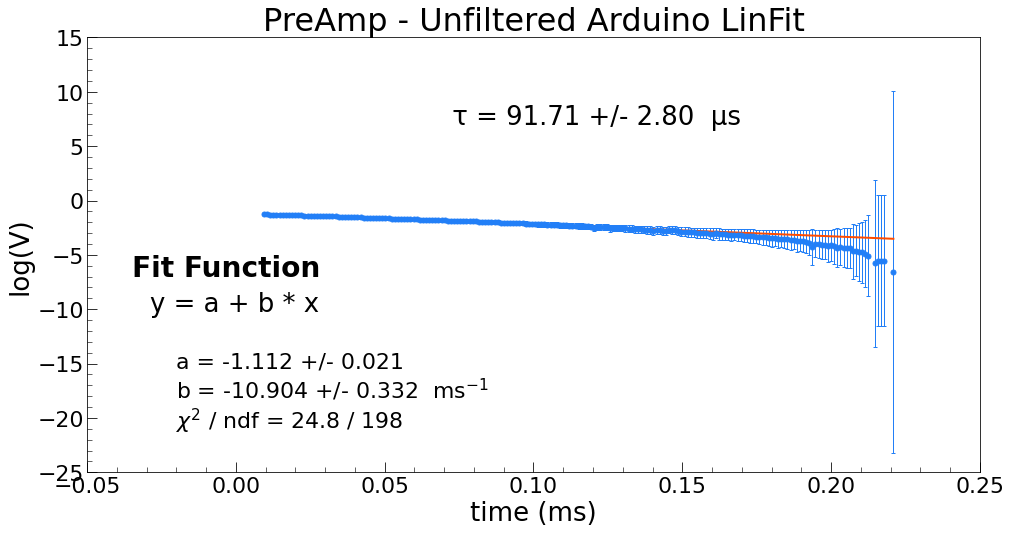

In [179]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = lin_data['time (ms)'], ydata = lin_data['logV'], sigma = lin_data['err logV'], absolute_sigma=True)

func = lin(lin_data['time (ms)'], *par)

# COMPUTE RESIDUALS
res = lin_data['logV'] - func
# COMPUTE CHI2
chi2 = np.sum((res/lin_data['err logV'])**2)
# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )
fit_par = par
fit_err = np.array(error)
a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]
# PLOT DATA
ax1.errorbar(lin_data['time (ms)'], lin_data['logV'], xerr = 0, yerr = lin_data['err logV'], elinewidth=1, capsize=2, color = '#227FF7', linewidth = 0, marker = '.', markersize = 10, label = 'lin_data')
ax1.plot(lin_data['time (ms)'], func, color = '#FF4B00', linewidth = 2, label = 'Fit')
aa = 'a = ' + format(a, '1.3f') + ' +/- ' + format(err_a, '1.3f')
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(err_b, '1.3f') + '  ms$^{-1}$'
tau = ' \u03C4 = ' + format(-b**-1 * 1e3, '1.2f') + ' +/- ' + format(err_b * b**-2 * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(lin_data['time (ms)'] ) - len(par), '1.0f') 
ax1.text(0.05, 0.45, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.07, 0.37, 'y = a + b * x', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.1, 0.1, aa + '\n' + bb + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)
ax1.text(0.4, 0.8, tau, fontsize = 26, color = '#000000', transform = ax1.transAxes)
# PLOT TITLE
ax1.set_title('PreAmp - Unfiltered Arduino LinFit', fontsize = 32)
# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('log(V)', fontsize = 26)
# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
# PLOT RANGE
#ax1.set_xlim(left = 0.30, right = 0.8)
#ax1.set_ylim(bottom = -6, top = 0)
# SAVE FIGURE
#fig.savefig('../Plots/Arduino_NR/preamp_unfiltered_linfit.png', dpi = 300, facecolor = 'white')
plt.show()